## Proyecto 2: EDA  datos de  automóviles

#### Nivel: principiantes en Python

#### Objetivo: aplicar conceptos basicos del EDA.

Se resumen las principales características de los datos, obtener una mejor comprensión del conjunto de datos, descubrir relaciones entre diferentes variables y extraer variables importantes para determinar el precio de un automóvil. 

1.Estadísticas descriptivas

2.Graficos: boxplot, de dispersion y mapas de calor

3.Agrupación utilizando groupby() 

4.Transformar tabla en tabla dinámica

5.Correlación para variable cuantitativas y variables catagoricas




#### Información de la base

La base tiene información de caracteristicas de diversos tipos de automóviles, que se pueden utilizar para determinar su precio. Conformada por 220 líneas y 29 columas. 

In [44]:
# importar librerias 
import pandas as pd
import numpy as np

In [2]:
# leer y ver data [1]
df = pd.read_csv('automobileEDA.csv')
df.head()


,symboling,normalizedlosses,make,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,...,horsepower,peakrpm,citympg,highwaympg,price,cityL/100km,horsepowerbinned,fuelsystem2,diesel,gas
0,3,122,alfaromero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495,11.190476,Medium,gas,0,1
1,3,122,alfaromero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500,11.190476,Medium,gas,0,1
2,1,122,alfaromero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500,12.368421,Medium,gas,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950,9.791667,Medium,gas,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450,13.055556,Medium,gas,0,1


### 1.Estadísticas descriptivas

In [3]:
# estadísticas básicas de variables numéricas
df.describe ()


,symboling,normalizedlosses,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cityL/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,1.119403,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.012754,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [4]:
# estadisticas para variables categoricas 
drive_wheels_counts = df["drivewheels"].value_counts().to_frame()
drive_wheels_counts


,drivewheels
fwd,118
rwd,75
4wd,8


In [5]:
# cambiar el nombre de la columna
drive_wheels_counts.rename(columns={'drivewheels':'valuecounts'},inplace=True)
drive_wheels_counts


,valuecounts
fwd,118
rwd,75
4wd,8


### 2.Graficos: boxplot, de dispersion y mapas de calor

<AxesSubplot:xlabel='drivewheels', ylabel='price'>

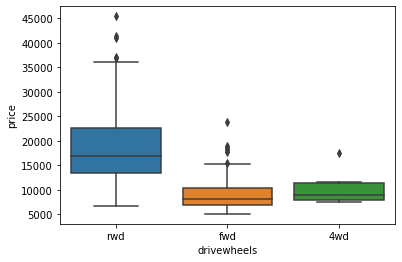

In [6]:
# boxplot visualiza y compara distribuciones de grupos con datos numericos 
import seaborn as sns 
sns.boxplot(x="drivewheels",y="price",data=df)


ANALISIS: se observa la distribucion de cada uno de los grupos que conforman la columna "drive-wheels" respecto al precio. Los datos de "rwd" son diferentes a los otros dos grupos. Sin embargo "fwd" y "4wd" son muy parecidos. 


Text(0, 0.5, 'Price')

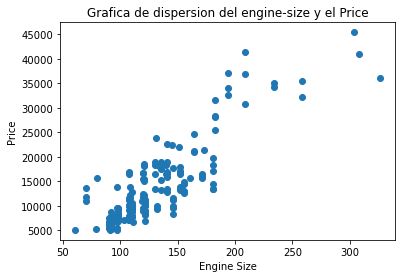

In [7]:
# Scatter Plot-gráfica de dispersión, ver la relacion entre variables numericas, el precio y el tamaño del motor 
import matplotlib.pyplot as plt
y=df["price"]
x=df["enginesize"]
plt.scatter(x,y)

# identificar grafica
plt.title("Grafica de dispersion del engine-size y el Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")


ANALISIS:la gráfica muestra que a medida que aumenta el tamaño del motor, el precio del carro también aumeta. Esto está dando una indicación inicial de que existe una relación lineal positiva entre estas dos variables.


### 3.Agrupacion de datos, metodo group by, variables categoricas 

Encontrar el precio medio de los vehículos y cómo difieren entre los estilos de carrocería y el tipo de llantas


In [8]:
# PRIMERO, seleccionar y asignar a un df las columnas para el analisis
df_test = df[['drivewheels','bodystyle','price']]
df_test


,drivewheels,bodystyle,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450
...,...,...,...
196,rwd,sedan,16845
197,rwd,sedan,19045
198,rwd,sedan,21485
199,rwd,sedan,22470


In [9]:
# SEGUNDO, agrupa los datos por cada una de las columnas y subcategorias que contienen  
df_grp = df_test.groupby(['drivewheels','bodystyle'],as_index=False).mean()
df_grp


,drivewheels,bodystyle,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### 4.Transformar tabla en tabla dinámica

In [10]:
# transformar tabla en tabla dinámica con el método pivot
df_pivot = df_grp.pivot(index ='drivewheels', columns ='bodystyle')
df_pivot


price                                            \
bodystyle   convertible       hardtop     hatchback         sedan   
drivewheels                                                         
4wd                 NaN           NaN   7603.000000  12647.333333   
fwd             11595.0   8249.000000   8396.387755   9811.800000   
rwd             23949.6  24202.714286  14337.777778  21711.833333   

                           
bodystyle           wagon  
drivewheels                
4wd           9095.750000  
fwd           9997.333333  
rwd          16994.222222

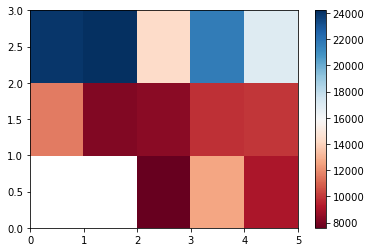

In [11]:
# representar tabla dinámica con un mapa de calor
import matplotlib.pyplot as plt
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()


### 5.Correlación para variable cuantitativas y variables categoricas

La correlación es una métrica estadística que mide hasta qué punto diferentes variables son interdependientes. Cuando se analizan dos variables a lo largo del tiempo, si una variable 'x' cambia o ¿cómo afecta esto al cambio en la otra variable 'y'? Es importante saber que la correlación no implica causalidad [2]

Se realiza un diagrama de dispersion y la linea de regresion.


(0.0, 53551.27375507066)

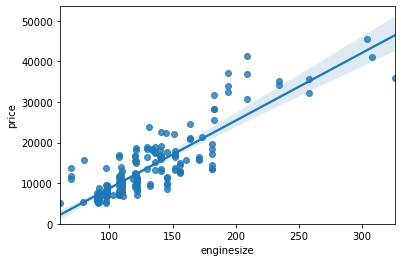

In [12]:
# relacion entre el tamaño del motor 'x' y el precio 'y'
sns.regplot(x="enginesize",y="price",data=df)
plt.ylim(0,)                                            


ANALISIS: el objetivo principal del diagrama de dispersión y la línea de regresión es ver si el tamaño del motor tiene algún impacto en el precio, si hay relacion entre las dos variables. 

La línea recta a través de los puntos de datos muestra que hay una relación lineal positiva entre las dos variables. Con el aumento de los valores del tamaño del motor 'x', los valores de precio aumentan también 'y'. Así que hay una correlación positiva entre el tamaño del motor y el precio. 


(0.0, 48175.516037236834)

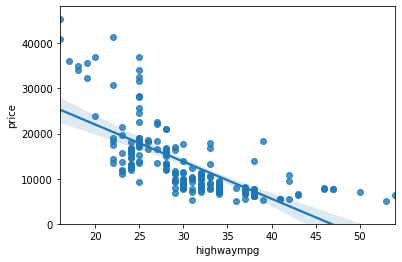

In [13]:
# relacion entre millas por galón y precio 
sns.regplot(x="highwaympg",y="price",data=df)
plt.ylim(0,)


ANALISIS: esta relación o correlacion es negativa, cuando la variable millas por galon 'x' aumenta la variable precio 'y' baja.


(0.0, 47414.1)

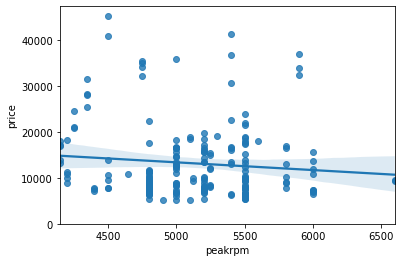

In [14]:
# relacion entre peak-rpm y precio
sns.regplot(x="peakrpm",y="price",data=df)
plt.ylim(0,)
                

ANALISIS: muestra una  correlación débil. Los datos altos y bajos de RPM tienen precios bajos y altos. Por lo tanto, no se puede utilizar para predecir los precios.

### Correlacion de Pearson  

Para variable numericas continuas y dos valores: el coeficiente de correlación y el p-value

**coeficiente de correlación

•Close to +1:Large Positive relationship

•Close to -1:Large Negative relationship

•Close to 0:No relationship


**p-value 

.P-value < 0.001 Strong certainty in the result

.P-value < 0.05 Moderate certainty in the result

.P-value < 0.1 Weak certainty in the result

.P-value > 0.1 No certainty in the result

Correlación fuerte: el coeficiente de correlación es cercano a +1 o -1, y el p-value <  0.001 



In [56]:
# ver correlación entre horsepower y precio con el coeficiente de correlacion de Pearson
import scipy as sp
from scipy import stats
pearson_coef,p_value = stats.pearsonr(df['horsepower'],df['price'])
pearson_coef,p_value 


(0.8095745670081455, 6.369057414856692e-48)

ANALISIS: el coeficiente de correlación es aproximadamente 0.8 y esto es cercano a 1. Así que hay una fuerte correlación. El p-value es muy pequeño, mucho más pequeño que 0.001. Se puede concluir una fuerte correlación positiva. 

In [16]:
# tabla de correlaciones, elimina NA valores y no numericos, corr() utiliza Pearson
correlacion = df.corr()
correlacion


,symboling,normalizedlosses,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cityL/100km,diesel,gas
symboling,1.000000,0.317859,-0.349973,-0.190084,-0.072917,-0.433030,-0.071761,-0.020203,0.022495,0.037904,-0.158187,0.218574,0.259969,-0.160872,-0.104662,0.029826,0.170846,-0.170907,0.170907
normalizedlosses,0.317859,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheelbase,-0.349973,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.190084,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.072917,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.433030,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curbweight,-0.071761,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
enginesize,-0.020203,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.022495,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,0.037904,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


<AxesSubplot:>

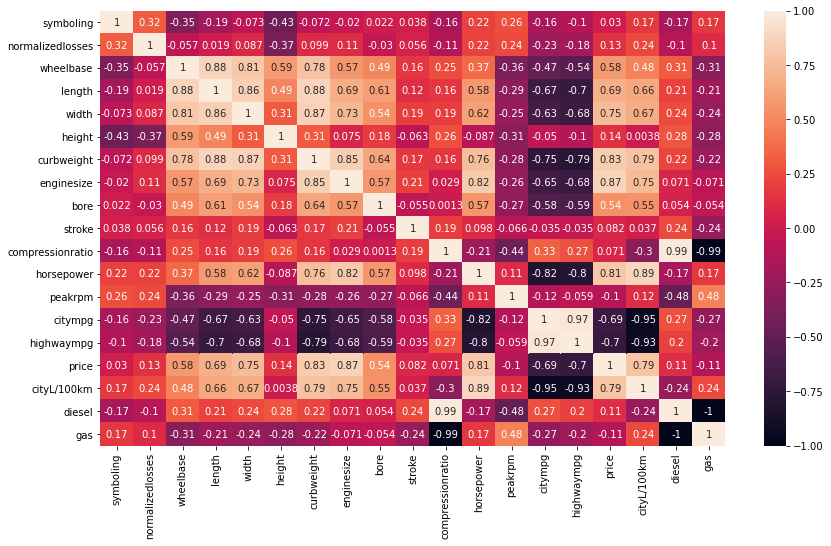

In [17]:
# mapa de calor de correlaciones [3]
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
sns.heatmap(correlacion, annot=True)


ANALISIS: muestra la correlación entre cada una de las variables. La combinación de colores indica el coeficiente de correlación de Pearson, mostrando la fuerza de la correlación entre dos variables. La línea diagonal con un color rosado mas claro, indica que todos los valores en esa diagonal están altamente correlacionados, es la correlación de todas las variables consigo mismas, que será siempre 1. 

Este mapa da un buen panorama de cómo las diferentes variables están relacionadas entre sí y, lo más importante, cómo están relacionadas con el precio.


### Relacion entre dos variables categóricas de una misma poblacion: test de independencia Chi-cuadrado 

Es una prueba no parametrica utilizada para determinar si existe una relación entre dos variables categóricas con escala de medición nominal u ordinal. No dice el tipo de relación que existe entre ambas variables, solo que existe una relación. 



In [70]:
# relacion entre fuelsystem and aspiration, obtner tabla cruzada o de contingencia [4]
import numpy as np
import seaborn as sns
tabla_contingecia = pd.crosstab(df.fuelsystem2, df.aspiration, margins=True, margins_name="Total")
tabla_contingecia

aspiration,std,turbo,Total
fuelsystem2,,,
disel,7,13,20
gas,158,23,181
Total,165,36,201


In [77]:
# test Chi-cuadrado
import numpy as np
import scipy as sp
from scipy.stats import chi2_contingency
c, p, dof, expected  = chi2_contingency(tabla_contingecia, correction = True)
print(c, p, dof, expected)


33.496718985434455 9.450137077403056e-07 4 [[ 16.41791045   3.58208955  20.        ]
 [148.58208955  32.41791045 181.        ]
 [165.          36.         201.        ]]


ANALISIS: Chi = 33.496718985434455 , p = 9.450137077403056e-07 , gl= 4 , valores esperados en corchetes. 
    
Dado que el valor de p es menor que 0.05, se rechaza la hipótesis nula que las dos variables son independientes.


[1] Link a la data original https://cloud.ibm.com/objectstorage/create. En la data utilizada se hizo algunas modficaciones para ajustarse a  los ejercicios presentados en clase.

[2] Estadistica,Mario F. Triola.

[3] Ver los diferentes tipos de graficas con seaborn https://www.python-graph-gallery.com/44-control-axis-limits-of-plot-seaborn

[4] Se agrego una columna a la base para realizar los ejercicios segun lo indicado en clase.


### time: 20 h